<a href="https://colab.research.google.com/github/porgill-prosper/airflow/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>MNIST</h1>

PyTorch number classification


In [0]:
#!pip3 install torch torchvision

In [0]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
#from sklearn import datasets

In [0]:
transform = transforms.Compose([transforms.Resize((28,28)), transforms.ToTensor(), transforms.Normalize((.5,), (.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
#training_dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

In [0]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  #print(image.shape)
  image = image * np.array((.5,.5,.5)) + np.array((.5, .5, .5))
  image = image.clip(0, 1)
  return image



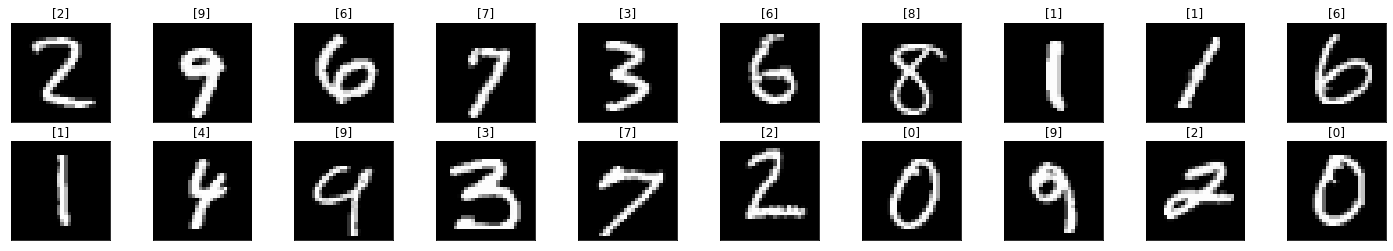

In [5]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])


In [0]:
class Classifier(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x
    

In [0]:
model = Classifier(784, 125, 65, 10)
#model

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.00005)

In [13]:
epochs = 10
running_loss_history = []
running_correct_history = []
test_running_loss_history = []
test_running_correct_history = []

for e in range(epochs):

  running_loss = 0.0
  running_corrects = 0.0
  test_running_loss = 0.0
  test_running_corrects = 0.0

  for inputs, labels in train_loader:
    inputs = inputs.view(inputs.shape[0], -1) #1, 28, 28 flattened to 1,784
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    running_corrects += torch.sum(preds == labels.data)
    running_loss += loss.item()

  else:
    with torch.no_grad():
      for test_inputs, test_labels in test_loader:
        test_inputs = test_inputs.view(test_inputs.shape[0], -1)
        test_outputs = model(test_inputs)
        test_loss = criterion(test_outputs, test_labels)

        _, test_preds = torch.max(test_outputs, 1)
        test_running_loss += test_loss.item()
        test_running_corrects += torch.sum(test_preds == test_labels.data)
        
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = running_corrects.float() / len(train_loader)
    running_loss_history.append(epoch_loss)
    running_correct_history.append(epoch_acc)

    test_epoch_loss = test_running_loss / len(test_loader)
    test_epoch_acc = test_running_corrects.float() / len(test_loader)
    test_running_loss_history.append(test_epoch_loss)
    test_running_correct_history.append(test_epoch_acc)

    print('epoch : ', e+1)
    print('train loss: {:.4f}, train accept {:.4f}'.format(epoch_loss, epoch_acc))
    print('test loss: {:.4f}, test accept {:.4f}'.format(test_epoch_loss, test_epoch_acc))



epoch :  1
train loss: 0.6355, train accept 83.2450
test loss: 0.5999, test accept 84.7500
epoch :  2
train loss: 0.5927, train accept 83.8750
test loss: 0.5317, test accept 85.9500
epoch :  3
train loss: 0.5613, train accept 84.7150
test loss: 0.5517, test accept 84.3000
epoch :  4
train loss: 0.5510, train accept 84.8050
test loss: 0.5042, test accept 86.2400
epoch :  5
train loss: 0.5462, train accept 85.3283
test loss: 0.5278, test accept 85.8100
epoch :  6
train loss: 0.5303, train accept 85.5483
test loss: 0.5013, test accept 86.4100
epoch :  7
train loss: 0.5275, train accept 85.5717
test loss: 0.4965, test accept 86.2600
epoch :  8
train loss: 0.5140, train accept 86.1883
test loss: 0.4927, test accept 87.3500
epoch :  9
train loss: 0.4987, train accept 86.7150
test loss: 0.4924, test accept 87.0900
epoch :  10
train loss: 0.4958, train accept 87.1700
test loss: 0.4813, test accept 87.1800


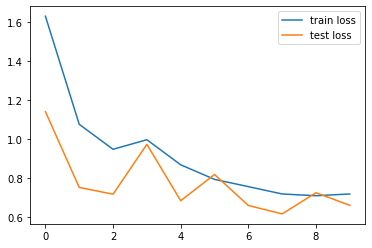

In [10]:
plt.plot(running_loss_history, label='train loss')
plt.plot(test_running_loss_history, label='test loss')
plt.legend()

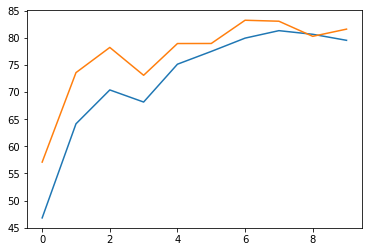

In [11]:
plt.plot(running_correct_history, label='train accuracy')
plt.plot(test_running_correct_history)

In [0]:
#!pip3 install pillow==4.0
import requests
import PIL.ImageOps
from PIL import Image
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
#print response
img = Image.open(response.raw)
#plt.imshow(open)

In [10]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img) 
plt.imshow(im_convert(img))

NameError: ignored